# Decomposed_Learning_Results (CL* Algorithm)


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# don't run this if you use google colab 
df =  pd.read_csv('data/Results.csv',index_col=False)

## Clean data

In [28]:
def round_data(data):
  return round(data, 3)

In [29]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>300) ]

In [30]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
df

,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,LSTAR_EQs,...,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CLSTAR_MQs,CACHE
0,Test-Generating/data/Point-To-Point/7.txt,408,6,1212440,20589,79831,533,1292271,21122,3,...,4444,532743,3529,880471,7973,28,4,4,7795,True
1,Test-Generating/data/Point-To-Point/10.txt,2295,6,6197733,218620,77427,512,6275160,219132,4,...,10831,833141,5553,1637843,16384,39,4,5,19197,True
2,Test-Generating/data/Point-To-Point/16.txt,440,6,2490534,42978,74832,501,2565366,43479,2,...,9616,831575,5545,1517796,15161,45,4,5,19351,True
3,Test-Generating/data/Point-To-Point/17.txt,720,6,3779561,78448,74907,502,3854468,78950,3,...,10460,838133,5546,1726577,16006,40,4,5,18336,True
4,Test-Generating/data/Point-To-Point/18.txt,336,6,2933608,47805,75182,502,3008790,48307,3,...,6691,534090,3548,1045123,10239,30,4,4,11959,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Test-Generating/data/Point-To-Point/489.txt,1632,6,1281189,32112,74677,501,1355866,32613,2,...,6198,832352,5542,1310456,11740,43,4,5,13581,True
97,Test-Generating/data/Point-To-Point/494.txt,1020,6,2537081,71893,74907,501,2611988,72394,2,...,9213,832767,5547,1570882,14760,43,4,5,17330,True
98,Test-Generating/data/Point-To-Point/496.txt,2592,9,1479542,35193,75905,501,1555447,35694,2,...,8129,832343,5558,1451752,13687,54,6,5,14572,True
99,Test-Generating/data/Point-To-Point/506.txt,1218,6,5069268,103758,76218,502,5145486,104260,3,...,12897,838485,5554,1920099,18451,44,4,5,24057,True


In [31]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

In [32]:
# @title Bins
bins = [300,600,900,1500,1800,2400, 3840]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [33]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   101
Min:     336
Max:     3400
mean:    1149.9108910891089
std:     658.1804174997901


C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2303827582.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2303827582.py:4: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2303827582.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current

In [34]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [35]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))



300 - 600
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=336, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4451, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4451, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=458577, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=458577, statistic_sign=-1)
ShapiroResult(statistic=0.9132049808691935, pvalue=5.677654941533722e-06)
ShapiroResult(statistic=0.9481656765750346, pvalue=0.0005863766600306264)
ShapiroResult(statistic=0.9481656765750346, pvalue=0.0005863766600306264)
ShapiroResult(statistic=0.9432718431513707, pvalue=0.00028482091769111155)
ShapiroResult(statistic=0.9432718431513707, pvalue=0.00028482091769111155)
600 - 900
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=336, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4451, statistic_sign=-1)
KstestResult(stati

In [36]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    CLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    CLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    CLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    CLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    CLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    CLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    CLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    CLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    CLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    CLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    CLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    CLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    CLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    CLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    CLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    CLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    CLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()

df3

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2274064958.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df["STATES"],bins))


,STATES,inputs,LSTAR_total_sym_median,LSTAR_total_sym_mean,LSTAR_total_sym_std,LSTAR_total_reset_median,LSTAR_total_reset_mean,LSTAR_total_reset_std,LSTAR_mq_sym_mean,LSTAR_mq_sym_std,...,CLSTAR_mq_sym_std,CLSTAR_mq_reset_mean,CLSTAR_mq_reset_std,CLSTAR_eq_sym_mean,CLSTAR_eq_sym_std,CLSTAR_eq_reset_mean,CLSTAR_eq_reset_std,CLSTAR_eqs,CLSTAR_components,CLSTAR_rounds
0,"(300, 600]",6.0,1885650.0,1.750329e+06,6.939040e+05,31209.0,31421.320000,13113.869101,1810370.0,6.939559e+05,...,199679.537659,7963.0,2388.787247,828701.0,168004.035199,5540.0,1125.524851,38.0,4.0,5.0
1,"(600, 900]",6.0,3045442.0,3.458772e+06,1.951255e+06,68100.0,61539.523810,28161.693634,2970681.0,1.950934e+06,...,229406.861911,10113.0,2675.187996,831851.0,145308.918658,5541.0,967.376792,41.0,4.0,5.0
2,"(900, 1200]",6.0,3907551.5,3.931280e+06,1.839258e+06,74731.5,72676.357143,33622.101382,3832064.5,1.839472e+06,...,194805.898321,9417.5,2515.680110,831801.5,180353.133785,5544.5,1203.717748,40.0,4.0,5.0
3,"(1200, 1500]",6.0,5633622.0,6.189608e+06,2.463929e+06,106739.5,109323.750000,37627.096615,5558383.5,2.464467e+06,...,134966.069065,11424.0,1526.227931,833882.5,110026.125362,5550.5,729.397816,44.5,4.0,5.0
4,"(1500, 1800]",6.0,7689455.0,7.066906e+06,4.220032e+06,143177.0,132854.375000,84671.759319,7613923.5,4.219716e+06,...,248372.105574,10387.5,3077.388113,833307.5,204010.819525,5546.0,1357.787169,42.0,4.0,5.0
5,"(1800, 2100]",6.0,7483117.0,9.885664e+06,6.248880e+06,203744.0,189208.333333,37825.618757,7405346.0,6.249596e+06,...,144938.906476,11586.0,1417.565636,833950.0,222463.367402,5565.0,1449.171257,48.0,4.0,5.0
6,"(2100, 2400]",6.0,5333705.5,5.376724e+06,1.936467e+06,114106.0,134863.750000,57176.190880,5256624.0,1.936400e+06,...,34886.038825,10768.5,257.069381,834366.0,3432.373474,5556.5,18.912077,46.5,4.0,5.0
7,"(2400, 3840]",7.5,7354474.0,9.290045e+06,6.448183e+06,194779.5,246018.166667,249616.177821,7279225.0,6.447915e+06,...,270025.748227,11794.5,2939.598028,833321.0,153385.681862,5555.0,1022.281892,50.5,5.0,5.0


In [37]:
# Progress
df3['CLSTAR_TOTAL_SYM_progress'] = (1 - (df3['CLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['CLSTAR_TOTAL_RST_progress'] = (1 - (df3['CLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['CLSTAR_MQ_SYM_progress'] = (1 - (df3['CLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['CLSTAR_MQ_RST_progress'] = (1 - (df3['CLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['CLSTAR_EQ_SYM_progress'] = (1 - (df3['CLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['CLSTAR_EQ_RST_progress'] = (1 - (df3['CLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [38]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'CLSTAR_TOTAL_SYM_pvalue':[],
'CLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue
  pvalue_info['STATES'].append(data_range)
  pvalue_info['CLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['CLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')

In [39]:
final_df['CLSTAR_TOTAL_SYM_pvalue']

0    0.000132
1    0.000106
2    0.000012
3    0.000041
4    0.000029
5    0.078634
6    0.016081
7    0.016036
Name: CLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [40]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'CLSTAR_total_sym_median',
       'CLSTAR_total_sym_mean', 'CLSTAR_total_sym_std',
       'CLSTAR_total_reset_median', 'CLSTAR_total_reset_mean',
       'CLSTAR_total_reset_std', 'CLSTAR_mq_sym_mean', 'CLSTAR_mq_sym_std',
       'CLSTAR_mq_reset_mean', 'CLSTAR_mq_reset_std', 'CLSTAR_eq_sym_mean',
       'CLSTAR_eq_sym_std', 'CLSTAR_eq_reset_mean', 'CLSTAR_eq_reset_std',
       'CLSTAR_eqs', 'CLSTAR_components', 'CLSTAR_rounds',
       'CLSTAR_TOTAL_SYM_progress', 'CLSTAR_TOTAL_RST_progress',
       'CLSTAR_MQ_SYM_progress', 'CLSTAR_MQ_RST_progress',
       'CLSTAR_EQ_SYM_progress', 'CLSTAR_EQ_R

## Tables 

In [41]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "CLSTAR_total_reset_mean", "CLSTAR_total_reset_std", "CLSTAR_TOTAL_RST_progress" ,"CLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,CLSTAR_total_reset_mean,CLSTAR_total_reset_std,CLSTAR_TOTAL_RST_progress,CLSTAR_TOTAL_RST_pvalue
0,"(300, 600]",31421.320000,13113.869101,12285.720000,3445.027425,60.900051,6.714636e-09
1,"(600, 900]",61539.523810,28161.693634,14336.285714,3556.609961,76.703938,6.292110e-08
2,"(900, 1200]",72676.357143,33622.101382,13746.000000,3414.431296,81.086009,1.033465e-06
3,"(1200, 1500]",109323.750000,37627.096615,17180.416667,1828.471366,84.284827,2.758434e-06
4,"(1500, 1800]",132854.375000,84671.759319,14898.000000,4179.231508,88.786218,1.859100e-05
5,"(1800, 2100]",189208.333333,37825.618757,17771.000000,572.186159,90.607708,8.021286e-03
6,"(2100, 2400]",134863.750000,57176.190880,16243.500000,262.290551,87.955622,1.264239e-02
7,"(2400, 3840]",246018.166667,249616.177821,17819.500000,3787.817987,92.756836,3.609521e-02


In [42]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "CLSTAR_total_sym_mean", "CLSTAR_total_sym_std", "CLSTAR_TOTAL_SYM_progress" ,"CLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,CLSTAR_total_sym_mean,CLSTAR_total_sym_std,CLSTAR_TOTAL_SYM_progress,CLSTAR_TOTAL_SYM_pvalue
0,"(300, 600]",1.750329e+06,6.939040e+05,1418358.0,355785.490185,18.966193,0.000132
1,"(600, 900]",3.458772e+06,1.951255e+06,1654087.0,362380.817532,52.177041,0.000106
2,"(900, 1200]",3.931280e+06,1.839258e+06,1478312.0,332936.245485,62.396163,0.000012
3,"(1200, 1500]",6.189608e+06,2.463929e+06,1795049.0,187365.241188,70.998989,0.000041
4,"(1500, 1800]",7.066906e+06,4.220032e+06,1654347.5,418433.399330,76.590216,0.000029
5,"(1800, 2100]",9.885664e+06,6.248880e+06,1788232.0,80485.991864,81.910857,0.078634
6,"(2100, 2400]",5.376724e+06,1.936467e+06,1703980.5,35361.430499,68.308204,0.016081
7,"(2400, 3840]",9.290045e+06,6.448183e+06,1782538.5,392769.312272,80.812381,0.016036


In [43]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [44]:
sns.set(rc={'figure.figsize':(15,6)})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2437269616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\2437269616.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


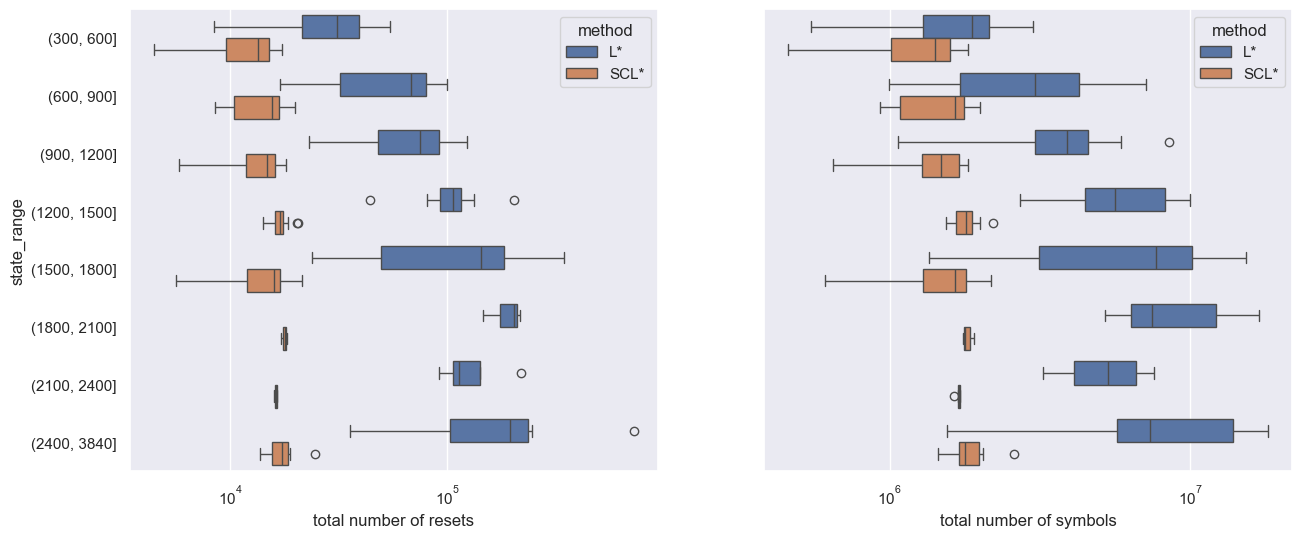

In [45]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'SCL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'SCL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'SCL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\3181691031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\3181691031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyk

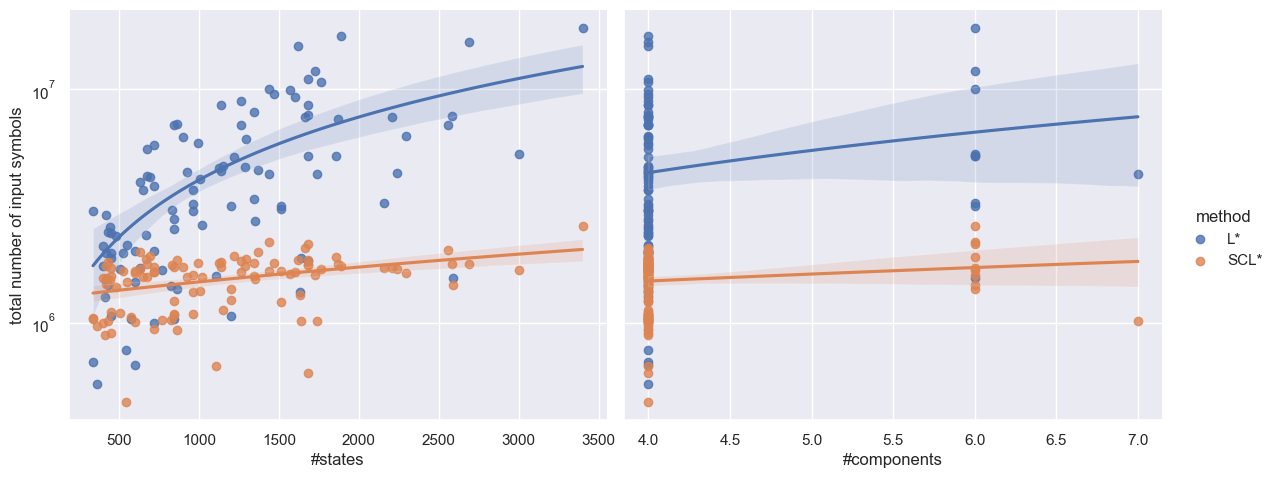

In [46]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\752197651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\752197651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

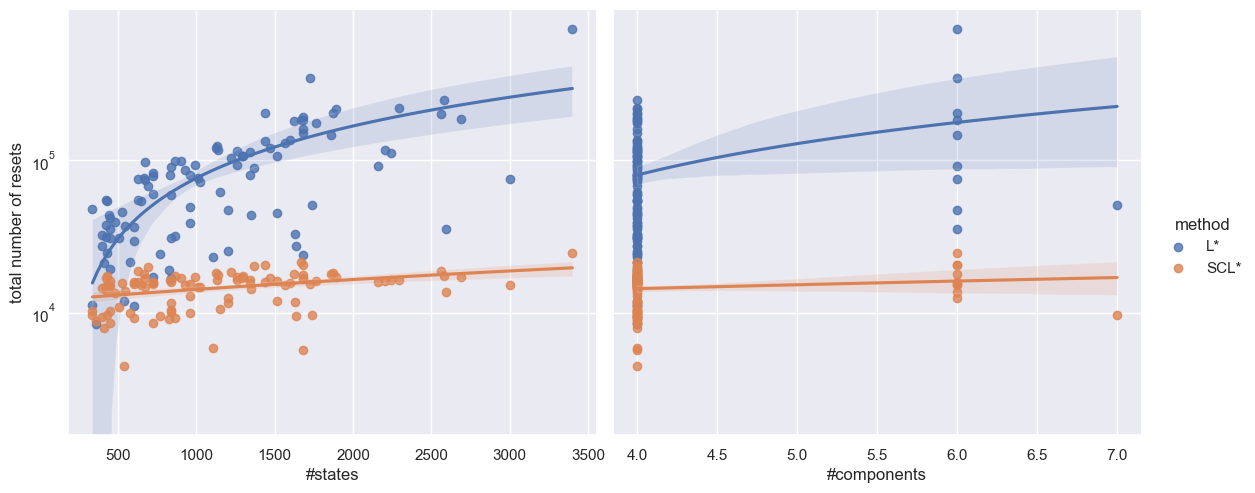

In [47]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\3879016189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\3879016189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\3879016189.py:

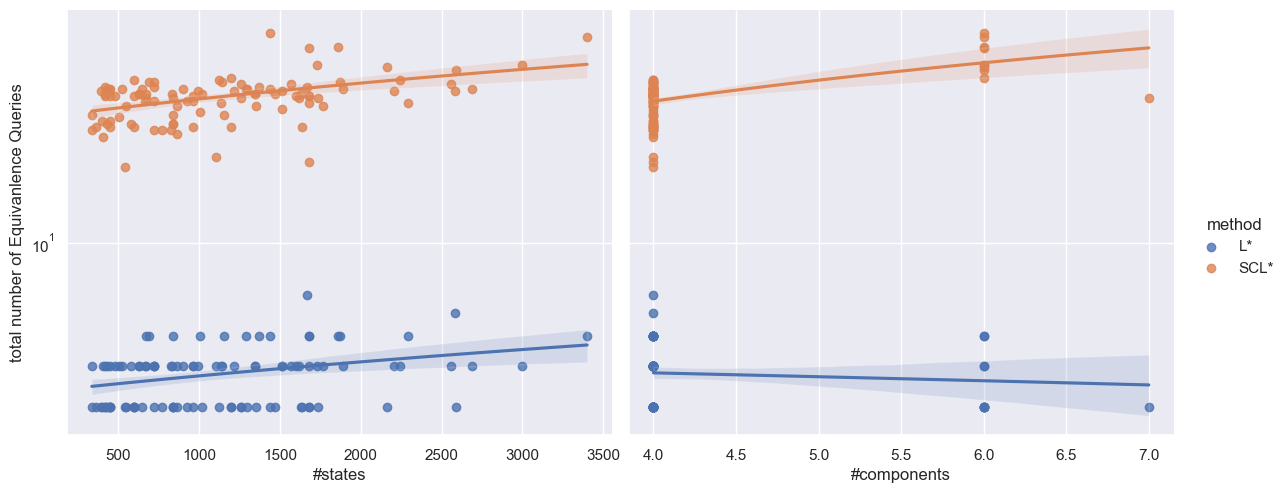

In [48]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_EQs', 'CLSTAR_EQs']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of Equivanlence Queries"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Equivanlence Queries"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\401320339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\401320339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_12016\401320339.py:3: 

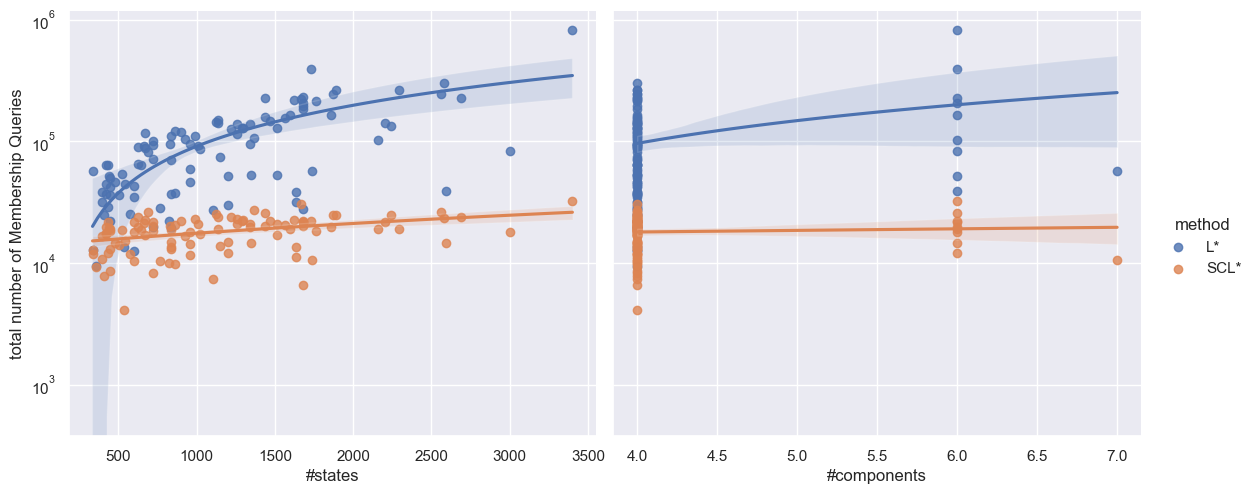

In [49]:
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_MQs', 'CLSTAR_MQs']]

d2[['L*',  'SCL*', '#components', '#states']] = d2[['LSTAR_MQs', 'CLSTAR_MQs', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'SCL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of Membership Queries"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Membership Queries"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')